<a href="https://colab.research.google.com/github/narutsoo/tutorial/blob/master/MC_KMeans_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# 03 : Clustering : K-Means (Iris data)

---

Create dataset (using sklearn datasets .. make blobs) 

*   Define n_samples (number of Samples) = 2000 samples
*   Define random_state (to re-produce the same every time it is run)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

* To separate input "feature" (X) and output "target" (y) variables 
* To show feature and target names 

In [2]:
X = iris.data
y = iris.target

print (iris.feature_names)
print (iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


* To visualize "Sepal length" and "Sepal width" with different (Iris) classes
* To compare with actual result

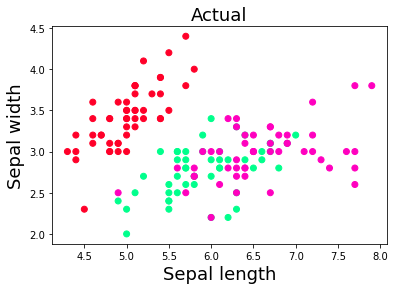

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title('Actual', fontsize=18)
plt.show()

* To perform "Standard Scaler" of input features (X)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* To perform K-Means (K = 3)

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state=21)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

* To print cluster centers 
* To transform to original coordinates by using scaler.inverse_transform()

In [6]:
centers = km.cluster_centers_

In [7]:
centers

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [8]:
centers_original = scaler.inverse_transform(centers)

In [9]:
print(centers_original)

[[5.80188679 2.67358491 4.36981132 1.41320755]
 [5.006      3.428      1.462      0.246     ]
 [6.78085106 3.09574468 5.5106383  1.97234043]]


In [10]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

* To visualize clustering results comparing with the actual data

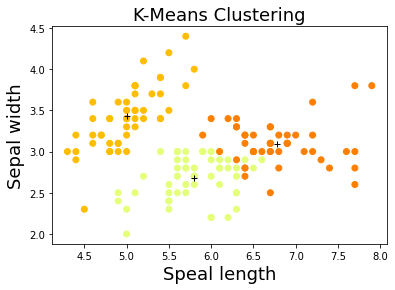

In [11]:
plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap='Wistia')
plt.plot(centers_original[:,0], centers_original[:,1], 'k+')
plt.xlabel('Speal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title('K-Means Clustering', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Cluster')

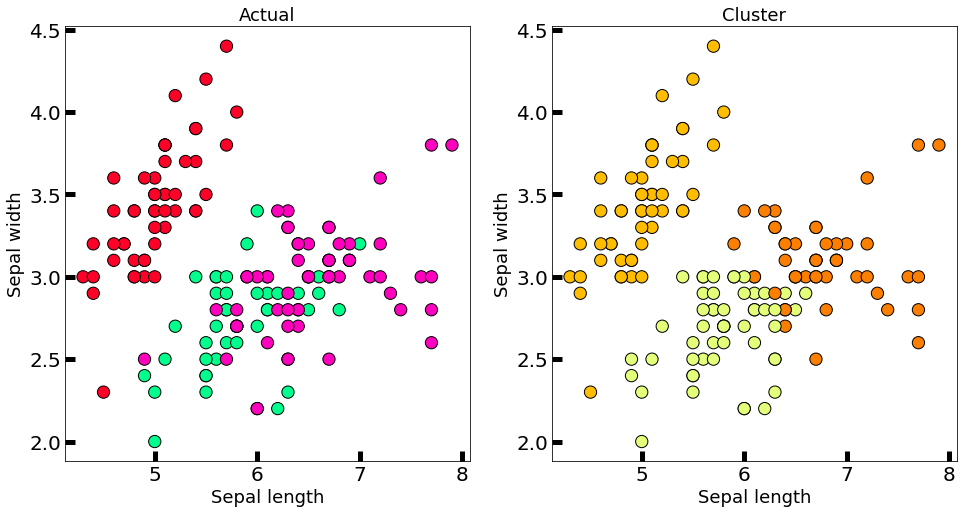

In [12]:
new_labels = km.labels_
# Plot the clustering result comparing with the actual data
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='Wistia',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Cluster', fontsize=18)